# Should Illinois Developers or Home Owners Install Solar Panel Systems?
This research project intends to provide both home builders and renovators in the state of Illinois with statistical analysis of the economic impact of building homes with solar panel systems, or adding solar panels to existing homes.

In [102]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import random
import pickle
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [103]:
with_df = pd.read_pickle("./with_df.pkl")
without_df = pd.read_pickle("./witho_df.pkl")
population_df = with_df.append(without_df, ignore_index=True)

In [104]:
population_df.head(1)

,% SP:OLP,City,Green Features,List Price,MLS #,MT,New,New Const,Remarks,Sold Pr
0,92,Champaign,NaN,129900,9639898,319.0,0,No,Wonderful home on double lot in south Champaig...,124000


In [105]:
print(with_df.shape)
print(without_df.shape)
print(population_df.shape)

(57, 10)
(2998, 10)
(3055, 10)


## Hypothesis 1: New and existing homes with solar panel systems have a higher value on average compared to homes without.
This first test is to compare the average sale price of a subset of new and existing home sales that have solar panel systems, with the average sale price of homes that do not.

$$\large H_0\text{:   }\bar{x} \leq \mu$$
$$\large H_a\text{:   }\bar{x} > \mu$$

In [106]:
#population mean, var, and std
pop_mean = round(population_df['Sold Pr'].mean(), ndigits=2)
pop_var = round(population_df['Sold Pr'].var(), ndigits=2)
pop_std = round(population_df['Sold Pr'].std(), ndigits=2)

In [107]:
print(f'Population Mean: {pop_mean}')
print(f'Population Variance: {pop_var}')
print(f'Population Standard Deviation: {pop_std}')

Population Mean: 323419.6
Population Variance: 35524966851.03
Population Standard Deviation: 188480.68


In [108]:
#population mean, var, and std
sol_mean = round(with_df['Sold Pr'].mean(), ndigits=2)
sol_var = round(with_df['Sold Pr'].var(), ndigits=2)
sol_std = round(with_df['Sold Pr'].std(), ndigits=2)

In [109]:
print(f'Solar Mean: {sol_mean}')
print(f'Solar Variance: {sol_var}')
print(f'Solar Standard Deviation: {sol_std}')

Solar Mean: 417916.28
Solar Variance: 45801253328.96
Solar Standard Deviation: 214012.27


### Left-Tail Z-Test

In [110]:
z = (sol_mean-pop_mean)/(pop_std/np.sqrt(57))
print(f'Z Score: {z}')

Z Score: 3.7851852438284985


In [111]:
p_value = 1 - stats.norm.cdf(z)
alpha = 0.05
print(p_value)

7.679706219776428e-05


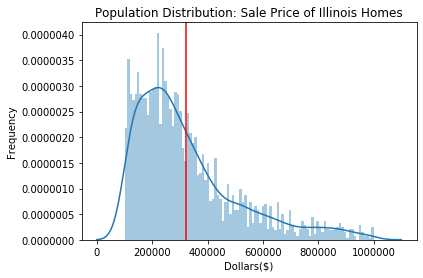

In [112]:
sns.distplot(population_df['Sold Pr'], bins=100)
plt.axvline(x=pop_mean, color='red')
plt.title("Population Distribution: Sale Price of Illinois Homes")
plt.xlabel('Dollars($)')
plt.ylabel('Frequency')
plt.plot()
plt.show()


### CLT Distribution

In [113]:
sample_means = []
for _ in range(1000):
    sample_means.append(round(np.random.choice(population_df['Sold Pr'], size=57).mean(), ndigits=2))

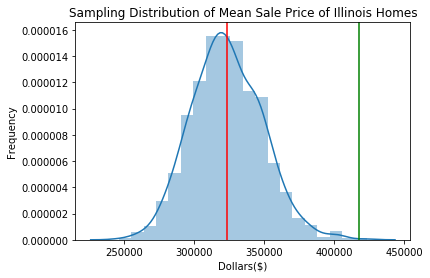

In [114]:
sns.distplot(sample_means, bins=20)
plt.axvline(x=np.mean(sample_means), color='red')
plt.axvline(x=sol_mean, color='green')
plt.title("Sampling Distribution of Mean Sale Price of Illinois Homes")
plt.xlabel('Dollars($)')
plt.ylabel('Frequency')

plt.plot()
plt.show()

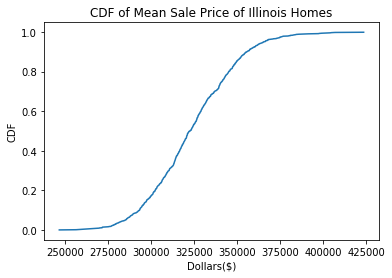

In [115]:
# let's create the cumulative distribution function for the random sample

rm = sorted(sample_means)
count = 0
cdf_dict = {rm[0]: count}

for i in range(1, len(rm)):
    if rm[i] > rm[i-1]:
        count += 1
        cdf_dict[rm[i]] = count/len(rm)
    else:
        count += 1
        
plt.plot(list(cdf_dict.keys()), list(cdf_dict.values()))
plt.title("CDF of Mean Sale Price of Illinois Homes")
plt.xlabel('Dollars($)')
plt.ylabel('CDF')

plt.plot()
plt.show()

In [116]:
count = 0
for mean in sample_means:
    if mean >= sol_mean:
        count += 1
count/len(sample_means)

0.001

## Hypothesis 2: New and existing homes with solar panel systems spend less time on the market than homes without.
The second test is to compare the average market time, in days, of homes with solar panels to homes without. 

$$\large H_0\text{:   }\bar{x} \geq \mu$$
$$\large H_a\text{:   }\bar{x} < \mu$$

In [117]:
#removing outliers from Market Time; any times greater than 730 days/2 years.
population_df2 = population_df[population_df['MT'] < 730]
population_df2.shape

(2969, 10)

In [118]:
#removing outliers from Market Time; any times greater than 730 days/2 years.
with_df2 = with_df[with_df['MT'] < 730]
with_df2.shape

(56, 10)

In [119]:
#population mean, var, and std
pop2_mean = round(population_df2['MT'].mean(), ndigits=2)
pop2_var = round(population_df2['MT'].var(), ndigits=2)
pop2_std = round(population_df2['MT'].std(), ndigits=2)

In [120]:
print(f'Population Mean: {pop2_mean}')
print(f'Population Variance: {pop2_var}')
print(f'Population Standard Deviation: {pop2_std}')

Population Mean: 204.17
Population Variance: 21111.65
Population Standard Deviation: 145.3


In [121]:
#population mean, var, and std
sol2_mean = round(with_df2['MT'].mean(), ndigits=2)
sol2_var = round(with_df2['MT'].var(), ndigits=2)
sol2_std = round(with_df2['MT'].std(), ndigits=2)

In [122]:
print(f'Solar Mean: {sol2_mean}')
print(f'Solar Variance: {sol2_var}')
print(f'Solar Standard Deviation: {sol2_std}')

Solar Mean: 86.38
Solar Variance: 8827.51
Solar Standard Deviation: 93.95


### Right Tailed Z-Test

In [123]:
z2 = (sol2_mean-pop2_mean)/(pop2_std/np.sqrt(56))
print(f'Z Score: {z2}')

Z Score: -6.066480710090881


In [124]:
p_value2 = stats.norm.sf(z2)
alpha2 = 0.05
print(p_value2)

0.9999999993462829


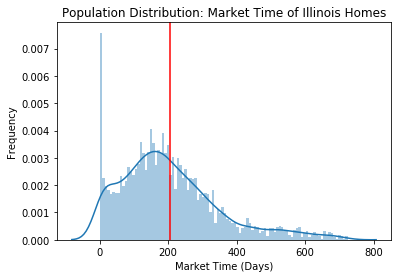

In [125]:
sns.distplot(population_df2['MT'], bins=100)
plt.axvline(x=pop2_mean, color='red')
plt.title("Population Distribution: Market Time of Illinois Homes")
plt.xlabel('Market Time (Days)')
plt.ylabel('Frequency')
plt.plot()
plt.show()